# 4.1.

In [1]:
import numpy as np
from numpy.linalg import inv, matmul

X = np.random.normal(0, 1, (20, 40))
W = np.random.normal(0, 1, (40, 5))
eps = np.random.normal(0, 0.1, (20, 5))
Y = np.matmul(X, W) + eps
alpha = 0.1

W_tilde = matmul(inv(matmul(X.T, X) + alpha*np.eye(40)), matmul(X.T, Y))

dp = 3
np.set_printoptions(precision=dp, suppress=True, linewidth=120)
print(f"W_tilde (values to {dp} dp):\n", W_tilde)

W_tilde (values to 3 dp):
 [[-1.425 -0.754  0.583  0.38   2.027]
 [ 0.076  0.596  0.718 -0.075 -0.709]
 [ 0.805 -0.223 -0.51   0.076 -0.727]
 [ 0.866  1.103  0.805  0.031  0.095]
 [ 0.279 -0.439  0.357 -0.009  0.014]
 [ 0.326 -0.807  0.979  1.078  0.174]
 [-0.319 -1.508  0.355 -0.466 -0.091]
 [ 1.56   0.242  0.885  0.729 -1.758]
 [ 1.172 -0.155  0.565 -0.89  -0.791]
 [ 0.464  0.23   0.805 -0.376  0.652]
 [-0.127 -0.742 -0.587  0.217 -1.089]
 [-0.817  0.645 -0.632  0.397  0.51 ]
 [ 0.132  0.271 -0.668 -1.014 -0.125]
 [ 0.397  1.237 -0.071  0.533  0.423]
 [ 0.571 -0.37  -0.906 -0.362 -0.816]
 [ 1.163 -0.093  0.878 -0.738  0.627]
 [ 1.477 -1.033 -0.307  0.846 -0.08 ]
 [-0.729  1.287 -0.028  0.97   1.163]
 [ 0.151 -0.217  0.078  0.141  0.239]
 [ 0.132  0.737  0.885 -0.869 -0.865]
 [-0.614  1.173  0.274  1.193  0.613]
 [ 0.563 -0.099  0.832 -0.212  0.113]
 [ 0.014  1.034 -1.32   1.423 -0.947]
 [ 0.459 -0.24  -0.347  0.509 -0.914]
 [-0.254 -0.374  0.491 -0.1    0.306]
 [-0.826  0.269  0.458 

# 4.2.

In [2]:
from sklearn.neural_network import MLPRegressor

model_gd = MLPRegressor(
hidden_layer_sizes=(), # No hidden layers
activation="identity", # Linear activation
solver="sgd", # Stochastic Gradient Descent
learning_rate_init=0.01,
max_iter=1000,
)
model_gd.fit(X, Y)
W_hat_gd = model_gd.coefs_[0]

dp = 3
np.set_printoptions(precision=dp, suppress=True, linewidth=120)
print(f"W_hat_gd (values to {dp} dp):\n", W_hat_gd)

W_hat_gd (values to 3 dp):
 [[-1.557 -0.841  0.591  0.421  2.064]
 [ 0.069  0.491  0.672 -0.025 -0.453]
 [ 0.894 -0.348 -0.368  0.107 -0.787]
 [ 0.742  1.143  0.571 -0.138  0.045]
 [ 0.043 -0.363  0.395 -0.393  0.321]
 [ 0.609 -0.919  1.231  1.165  0.209]
 [-0.506 -1.577  0.472 -0.688  0.021]
 [ 1.588 -0.041  0.774  0.642 -1.772]
 [ 1.34  -0.232  0.581 -0.719 -0.809]
 [ 0.637  0.339  0.462 -0.337  0.558]
 [ 0.089 -0.657 -0.693  0.326 -1.224]
 [-0.586  0.702 -0.693  0.606  0.236]
 [-0.039  0.219 -0.803 -1.208 -0.077]
 [ 0.333  1.401  0.044  0.207  0.575]
 [ 0.717 -0.539 -0.748 -0.583 -0.606]
 [ 1.166 -0.015  0.934 -0.482  0.626]
 [ 1.281 -1.081 -0.452  0.689 -0.015]
 [-0.616  1.023 -0.111  0.951  1.368]
 [ 0.379  0.05  -0.158  0.563  0.005]
 [ 0.239  0.921  0.836 -0.885 -1.049]
 [-0.859  1.233  0.377  1.279  0.605]
 [ 0.342 -0.147  0.744 -0.539  0.383]
 [-0.365  0.989 -1.356  1.466 -0.888]
 [ 0.428 -0.077 -0.413  0.387 -1.06 ]
 [-0.115 -0.312  0.444 -0.229  0.082]
 [-0.842  0.021  0.25 

# 4.3.

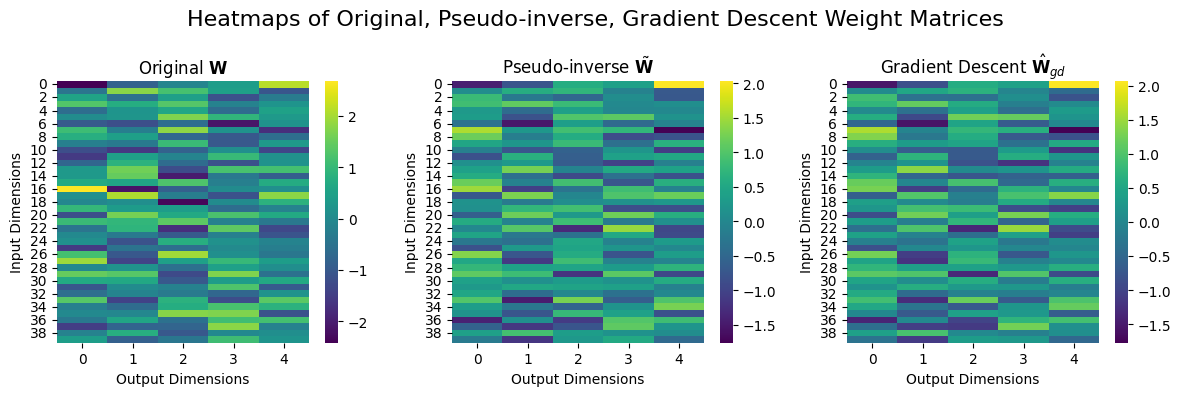

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for heatmaps
matrices = [W, W_tilde, W_hat_gd]
titles = [r"Original $\mathbf{W}$", 
          r"Pseudo-inverse $\tilde{\mathbf{W}}$", 
          r"Gradient Descent $\hat{\mathbf{W}}_{gd}$"]

fig, axes = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle("Heatmaps of Original, Pseudo-inverse, Gradient Descent Weight Matrices", fontsize=16)
for ax, matrix, title in zip(axes, matrices, titles):
    sns.heatmap(matrix, ax=ax, cmap="viridis")
    ax.set_title(title)
    ax.set_xlabel("Output Dimensions")
    ax.set_ylabel("Input Dimensions")

plt.tight_layout()
plt.show()